In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
#import plotly.express as px

# Reading data

In [34]:
data = pd.read_csv('C:\\Users\\ville\\Documents\\Dissertacao Mestrado\\Programas R\\Milena-lepes.csv' , encoding='latin-1')
data.shape

C:\Users\ville\AppData\Local\Temp\ipykernel_19812\2755148528.py:1: DtypeWarning: Columns (1,4,5,9,10,11,12,13,14,15,16,17,18,19,20,108,113,372,374,377,378,379,380,381,382,383,384,385,386,387,388,389,405,406,407,408,688,692,860,861,864,865,866,867,868,869,870,871,934,936,950,981,997,1010,1013,1070,1140,1141,1142,1143,1144,1145,1146,1147,1168,1184,1221,1222,1224,1227,1244,1245,1251,1252,1256,1257,1258,1262,1263,1340,1350,1352) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:\\Users\\ville\\Documents\\Dissertacao Mestrado\\Programas R\\Milena-lepes.csv' , encoding='latin-1')


(8278, 1354)

Select mothers of both 1º questionnaire and 2º

In [45]:
data.isnull().sum()

chave               0
gestante         6878
codbarra           30
pncidadep        6878
pndataentp       6878
                 ... 
tnaoinfluenza    8273
thepatitea       8113
tnaohepatite     8265
tvaricela        7765
seguimentow1        0
Length: 1354, dtype: int64

In [44]:
#ata.isnull().sum()
pd.isnull(data[['gestante','tnomemae']]).sum()

gestante    6878
tnomemae    4107
dtype: int64

In [51]:
data.dropna(axis=0, subset=['gestante','tnomemae']).shape

(1079, 1354)

In [131]:
data_all1 = data.dropna(axis=0, subset=['gestante'])
data_all1.shape

(1400, 1354)

1400 women participated on the first questionnaire, that was applied during pregnancy between February 2010 to February 2011 at Ribeirão Preto-SP.
From these 1400, 1079 continued on the research and participated on the follow-up questionnaire.

First we are goint to treat all data and than create the model with the 1079 women and apply the model for the rest of women, who did not attend to the follow-up research.

y: trabalhar com criança pequena

x: educacao, raca, filhos antes, trabalhava antes, tem marido, todo trabalho domestico

In [132]:
data_all1 = data_all1[['gestante','tnomemae','trabcasa','pnativremp','pnqtfilhosp','pnmorafilhop','pncursog','cormae','pnsitcong','tativrem']]

In [133]:
pd.isnull(data_all1).sum()

gestante          0
tnomemae        321
trabcasa         30
pnativremp        0
pnqtfilhosp       0
pnmorafilhop      0
pncursog          0
cormae           30
pnsitcong         0
tativrem        323
dtype: int64

In [134]:
for variable in ['trabcasa','pnativremp','pnqtfilhosp','pnmorafilhop','pncursog','cormae','pnsitcong', #x
                     'tativrem' #y
                     ]:
    print(f"{variable}:")
    print(np.unique(data_all1[variable], return_counts=True))


trabcasa:
(array([ 1.,  2.,  3., nan]), array([677, 583, 110,  30], dtype=int64))
pnativremp:
(array([1., 2., 9.]), array([665, 731,   4], dtype=int64))
pnqtfilhosp:
(array([ 1.,  2.,  3.,  4.,  5.,  6., 88., 99.]), array([409, 196,  52,  18,   1,   3, 716,   5], dtype=int64))
pnmorafilhop:
(array([1., 2., 9.]), array([683, 713,   4], dtype=int64))
pncursog:
(array([1., 2., 3., 4., 5., 8., 9.]), array([  5, 383, 892,  51,  63,   2,   4], dtype=int64))
cormae:
(array([ 1.,  2.,  3.,  4.,  9., nan]), array([700, 152, 500,   6,  12,  30], dtype=int64))
pnsitcong:
(array([1., 2., 3., 4., 9.]), array([500, 631, 239,  26,   4], dtype=int64))
tativrem:
(array([ 1.,  2., nan]), array([655, 422, 323], dtype=int64))


In [135]:
def all_housew(trabcasa):
    if trabcasa == 1:
        return 1
    elif trabcasa == 2:
        return 0
    else:
        return None


data_all1['all_housew'] = data_all1['trabcasa'].apply(all_housew)
print(np.unique(data_all1['all_housew'], return_counts=True))

(array([ 0.,  1., nan]), array([583, 677, 140], dtype=int64))


In [136]:
def work(pnativremp):
    if pnativremp == 1:
        return 1
    elif pnativremp == 2:
        return 0
    else:
        return None


data_all1['work'] = data_all1['pnativremp'].apply(work)
print(np.unique(data_all1['work'], return_counts=True))


(array([ 0.,  1., nan]), array([731, 665,   4], dtype=int64))


In [137]:
data_all1['work_after'] = data_all1['tativrem'].apply(work)
print(np.unique(data_all1['work_after'], return_counts=True))

(array([ 0.,  1., nan]), array([422, 655, 323], dtype=int64))


In [138]:
def married(pnsitcong):
    if pnsitcong == 1 or pnsitcong == 2:
        return 1
    elif pnsitcong == 3 or pnsitcong == 4 or pnsitcong == 5:
        return 0
    else:
        return None


data_all1['married'] = data_all1['pnsitcong'].apply(married)
print(np.unique(data_all1['married'], return_counts=True))

(array([ 0.,  1., nan]), array([ 265, 1131,    4], dtype=int64))


In [139]:
def education(pncursog):
    if pncursog == 1 or pncursog == 2:   #elemntary school
        return 1
    elif pncursog == 3 :                 #high school
        return 2
    elif pncursog == 4 or pncursog == 5: #graduation or more
        return 3
    else:
        return None


data_all1['level_educat'] = data_all1['pncursog'].apply(education)
print(np.unique(data_all1['level_educat'], return_counts=True))

(array([ 1.,  2.,  3., nan]), array([388, 892, 114,   6], dtype=int64))


In [140]:
def black(cormae):
    if cormae == 2 or cormae == 3:   
        return 1
    elif cormae == 1 or cormae == 4 or cormae == 5: 
        return 0
    else:
        return None


data_all1['black'] = data_all1['cormae'].apply(black)
print(np.unique(data_all1['black'], return_counts=True))

(array([ 0.,  1., nan]), array([706, 652,  42], dtype=int64))


In [141]:
def prev_child(pnqtfilhosp,pnmorafilhop):
    if pnqtfilhosp < 88:   
        return 1
    elif pnqtfilhosp == 88 and pnmorafilhop == 2: 
        return 0
    elif pnqtfilhosp == 88 and pnmorafilhop == 1: 
        return 1
    else:
        return None


data_all1['previous_child'] = data_all1.apply(lambda x: prev_child(x['pnqtfilhosp'],x['pnmorafilhop']),axis =1 )
print(np.unique(data_all1['previous_child'], return_counts=True))

(array([ 0.,  1., nan]), array([710, 685,   5], dtype=int64))


In [142]:
final_data = data_all1[['gestante','tnomemae','married','previous_child','black','level_educat','all_housew','work','work_after']]

In [143]:
pd.isnull(final_data).sum()

gestante            0
tnomemae          321
married             4
previous_child      5
black              42
level_educat        6
all_housew        140
work                4
work_after        323
dtype: int64

# Visualize data

<Axes: xlabel='work', ylabel='count'>

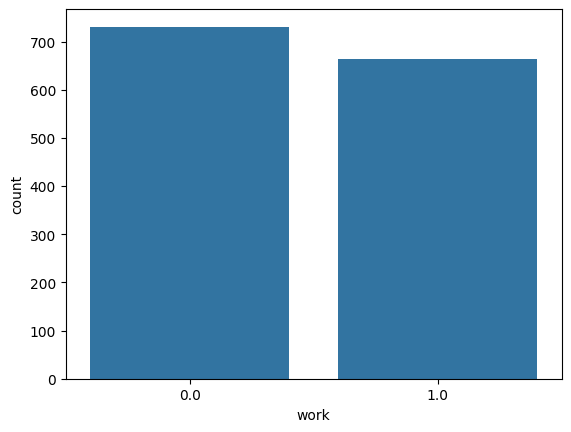

In [144]:
sns.countplot(x = final_data['work'])

<Axes: xlabel='work_after', ylabel='count'>

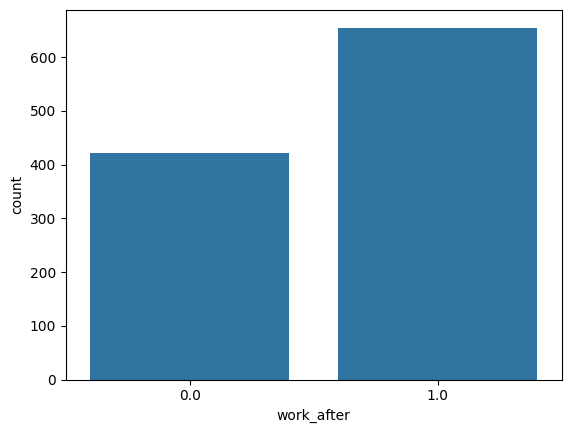

In [145]:
sns.countplot(x = final_data['work_after'])

# Separate X variables from Y

In [191]:
data_train = final_data.dropna(axis=0, subset=['gestante','tnomemae'])
data_train.shape

(1079, 9)

In [192]:
pd.isnull(data_train.iloc[:,2:9]).sum() # missing on y variable #IT CAN'T HAPPEN

married            1
previous_child     2
black              8
level_educat       2
all_housew        88
work               1
work_after         2
dtype: int64

In [193]:
data_train = data_train.dropna(axis=0, subset=['married','previous_child','black','level_educat','all_housew','work','work_after'])
data_train.shape

(979, 9)

In [166]:
#data_train

In [194]:
X_data_training = data_train.iloc[:,2:8].values
X_data_training

array([[1., 1., 0., 2., 1., 1.],
       [1., 1., 0., 2., 0., 1.],
       [0., 0., 0., 2., 1., 0.],
       ...,
       [1., 0., 0., 3., 0., 1.],
       [1., 0., 0., 2., 0., 0.],
       [1., 1., 0., 1., 0., 1.]])

In [196]:
Y_data_training = data_train.iloc[:,8].values
Y_data_training

array([1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 0.

In [165]:
#final_data[final_data['tnomemae'].isnull()]

In [201]:
data_predict = final_data[final_data['tnomemae'].isnull()]
data_predict.shape

(321, 9)

In [202]:
pd.isnull(data_predict.iloc[:,2:8]).sum()

married            3
previous_child     3
black             34
level_educat       4
all_housew        52
work               3
dtype: int64

In [203]:
data_predict = data_predict.dropna(axis=0, subset=['married','previous_child','black','level_educat','all_housew','work'])
data_predict.shape

(264, 9)

In [204]:
X_data_predict = data_predict.iloc[:,2:8].values
X_data_predict

array([[0., 0., 0., 2., 0., 0.],
       [1., 1., 0., 2., 0., 0.],
       [1., 0., 1., 2., 1., 1.],
       ...,
       [0., 1., 0., 2., 0., 1.],
       [1., 1., 1., 2., 1., 1.],
       [1., 1., 0., 1., 1., 0.]])

# Writting/saving data

In [170]:
import pickle

In [205]:
with open('data_mothers.pkl', mode = 'wb') as f:
    pickle.dump([X_data_training, Y_data_training, X_data_predict], f)